# Exploring eBay Car Sales Data
## Introduction
The goal of this project will be to clean and analyze a dataset of used cars from the *classifieds* section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle by the user **orgesleka** but it is no longer available there. Instead, you can find it [here](https://data.world/data-society/used-cars-data).

A slice of 50,000 rows was sampled and dirtied intentionally by the online bootcamp *Dataquest* to resemble a real world scraped dataset.

### Dataset Description

`dateCrawled` - When this ad was first crawled. All field-values are taken from this date.

`name` - Name of the car.

`seller` - Whether the seller is private or a dealer.

`offerType` - The type of listing

`price` - The price on the ad to sell the car.

`abtest` - Whether the listing is included in an A/B test.

`vehicleType` - The vehicle Type.

`yearOfRegistration` - The year in which the car was first registered.

`gearbox` - The transmission type.

`powerPS` - The power of the car in PS.

`model` - The car model name.

`kilometer` - How many kilometers the car has driven.

`monthOfRegistration` - The month in which the car was first registered.

`fuelType` - What type of fuel the car uses.

`brand` - The brand of the car.

`notRepairedDamage` - If the car has a damage which is not yet repaired.

`dateCreated` - The date on which the eBay listing was created.

`nrOfPictures` - The number of pictures in the ad.

`postalCode` - The postal code for the location of the vehicle.

`lastSeenOnline` - When the crawler saw this ad last online.

## Read Data into Dataframe
Let's begin by importing the pandas, numpy and matplotlib.pyplot libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in the `'autos.csv'` file into a dataframe and print summary information using `.info()` and `.describe()`.

In [2]:
autos_raw = pd.read_csv('autos.csv', encoding = 'Latin-1') # default "UTF-8" was incompatible.
autos = autos_raw.copy()
autos.info()
autos.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Observations of the 20 columns in the dataset:

    15 are object columns (presumably string types), 5 are integer columns
    5 columns contain null values, but no more than ~20%
    Some of the column labels are in camelcase instead of Python's preferred snakecase
    Two columns, *price* and *odometer* contain numeric data in text form
    Three columns,*nrOfPictures, *seller* and *offer_type* contain > 99% of the same unique value
Let's first work on the column labels.

## Cleaning and Exploration
### Cleaning Column Names

We will use the `.columns` attribute to make edits to the original labels by converting from camelcase to snakecase.

Certain labels will also be altered to improve understanding and readability, eg. `monthOfRegistration` to `registration_month`.

Let's take a look at the current column names.

In [3]:
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


We'll copy the array and make the changes mentioned above.

In [4]:
autos.columns = ['crawl_start', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_pictures', 'postal_code',
       'crawl_end']

print(autos.columns)

Index(['crawl_start', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_pictures', 'postal_code',
       'crawl_end'],
      dtype='object')


### **Flagging Columns for Removal**

Now, let's take a closer look at the columns `seller`, `offer_type`, and `num_pictures`. 

In [5]:
autos[['seller','offer_type','num_pictures']].describe(include = 'all')

,seller,offer_type,num_pictures
count,50000,50000,50000.0
unique,2,2,NaN
top,privat,Angebot,NaN
freq,49999,49999,NaN
mean,NaN,NaN,0.0
std,NaN,NaN,0.0
min,NaN,NaN,0.0
25%,NaN,NaN,0.0
50%,NaN,NaN,0.0
75%,NaN,NaN,0.0


From the statistics above, we see that the columns `seller` and `offer_type` both contain a unique value with a frequency of 49,999 (of 50,000), which doesn't allow for any insightful comparison. 

Above, `.info()` showed that `num_pictures`  has 50,000 non-null values but the statistics here return 0s or NaN values. Let's understand why.

In [6]:
print(f"The no. of rows is: {autos['num_pictures'].shape[0]:,}")
print("The unique values are: ",autos['num_pictures'].unique())

The no. of rows is: 50,000
The unique values are:  [0]


`num_pictures` has 50,000 counts of the value 0. This is definitely not insightful and can be removed.

In [7]:
autos.drop(['seller','offer_type','num_pictures'], axis = 1, inplace = True)

### **Cleaning and Converting Text Data**

The columns `price` and `odometer_km` contain numeric data stored as text and we can clean and convert by:

    1. Investigating both columns

In [8]:
print("'Price' Sample: ","\n", autos["price"].head(),"\n")
print("'Odometer' Sample: ", "\n", autos["odometer_km"].head())

'Price' Sample:  
 0    $5,000
1    $8,500
2    $8,990
3    $4,350
4    $1,350
Name: price, dtype: object 

'Odometer' Sample:  
 0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer_km, dtype: object


    2. Removing any non-numeric characters: (,) from both columns, ($) from `price` and (km) from `odometer_km`.
    3. Converting columns to a numeric dtype

In [9]:
autos["price"] = (autos["price"]
                    .str.replace("$","")
                    .str.replace(",","")
                    .astype(int)
                   )

autos["odometer_km"] = (autos["odometer_km"]
                    .str.replace("km","")
                    .str.replace(",","")
                    .astype(int)
                   )

C:\Users\Aaron\AppData\Local\Temp\ipykernel_5448\1202278035.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace("$","")


We investigate the columns to show that the dtype for both columns are int64, and a preview of the values indicate we removed the non-numeric characters.

In [10]:
print("'Price' Sample: ","\n", autos["price"].head(),"\n")
print("'Odometer' Sample: ", "\n", autos["odometer_km"].head())

'Price' Sample:  
 0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32 

'Odometer' Sample:  
 0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int32


### **Exploring Outliers**

Let's delve deeper into the data and gain insight into what doesn't look right.

We'll continue our analysis with the columns we cleaned, `price` and `odometer_km`.

### **`Price`**

In [11]:
prices = autos["price"]

print("Descriptive Statistics for Prices: ","\n","-"*30,"\n", prices.describe().apply(lambda x: format(x, 'f')),"\n")
print("Top Value Counts: ","\n","-"*30,"\n", prices.value_counts().sort_index(ascending = False).head(5), "\n")
print("Bottom Value Counts: ", "\n","-"*30,"\n", prices.value_counts().sort_index(ascending = True).head(5), "\n")

Descriptive Statistics for Prices:  
 ------------------------------ 
 count       50000.000000
mean         9840.043760
std        481104.380500
min             0.000000
25%          1100.000000
50%          2950.000000
75%          7200.000000
max      99999999.000000
Name: price, dtype: object 

Top Value Counts:  
 ------------------------------ 
 99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
Name: price, dtype: int64 

Bottom Value Counts:  
 ------------------------------ 
 0    1421
1     156
2       3
3       1
5       2
Name: price, dtype: int64 



The stats indicate a large price range with outliers skewing the data. The max value of `$99,999,999` is concerning when the median is at `$2,950`.

There are 1,421 counts of the value `$0`, whereas some used cars are valued at several millions of dollars (possibly antique).

Let's visualize this skew with a boxplot and extract the parameter "caps", where the upper and lower limit ends at the most extreme, **non-outlier** data points.

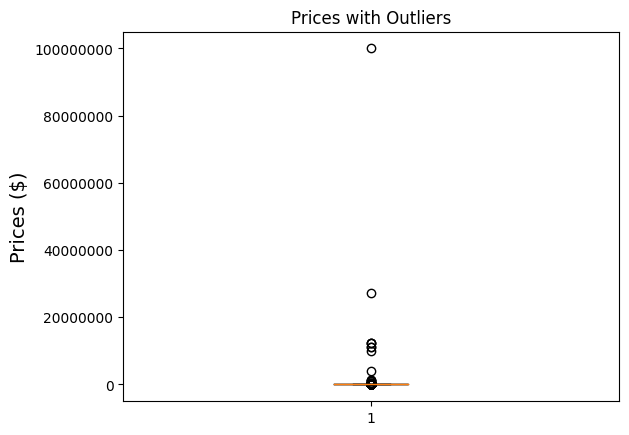

Lower Extreme, Non-Outlier Limit:  0
Upper Extreme, Non-Outlier Limit:  16350


In [12]:
%matplotlib inline
plt.title("Prices with Outliers")
plt.ylabel("Prices ($)", fontsize = 14)
plt.ticklabel_format(axis = 'y', style = 'plain')

stats = plt.boxplot(prices)
plt.show()

# Extracts the mapping dictionary that is returned when creating a boxplot
results = {key : [v.get_data() for v in value] for key, value in stats.items()}

# Prints the parameter "caps" from the above mapping dictionary
print("Lower Extreme, Non-Outlier Limit: ",results['caps'][0][1][0])
print("Upper Extreme, Non-Outlier Limit: ",results['caps'][1][1][0])

We can see just how influential the outliers skew the data. 

The extreme, **non-outlier** limits returned from the boxplot are `$0` & `$16,350`. Recall that the max value is `$99,999,999`.

Let's visualize the boxplot again with the outliers removed from the dataset.

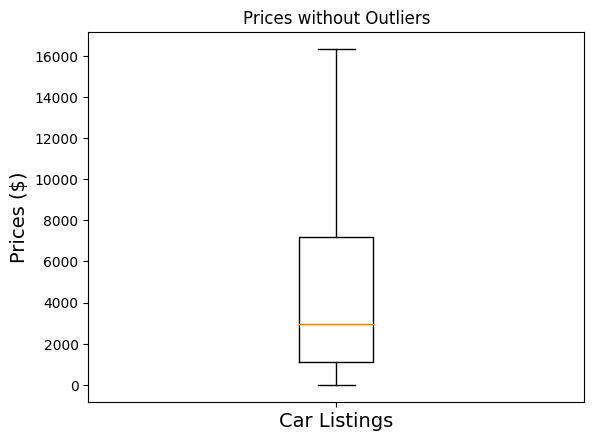

In [13]:
%matplotlib inline
plt.boxplot(prices, showfliers = False)
plt.title("Prices without Outliers")
plt.ylabel("Prices ($)", fontsize = 14)
plt.xlabel("Car Listings", fontsize = 14)
plt.tick_params(labelbottom = False)
plt.show()

Removing the outliers, we see a better distribution in the range of `$0` - `$16,350`.

While this range provides a more representative distribution, the listings at `$0` could be detrimental to our analysis.

Let's calculate the percentage of listings with the price of `$0` and those above `$16,350` and see if it safe to remove them.

In [14]:
num_0 = prices[prices == 0] # considers only prices at $0

pct_0 = num_0.shape[0] / prices.shape[0] * 100

print(f"Prices at $0 account for {pct_0:.2f}% of the total prices.")

Prices at $0 account for 2.84% of the total prices.


In [15]:
num_over = prices[prices > 16350] # considers only prices at $0

pct_over = num_over.shape[0] / prices.shape[0] * 100

print(f"Prices above $16,350 account for {pct_over:.2f}% of the total prices.")

Prices above $16,350 account for 7.57% of the total prices.


Of the 50,000 rows in the dataset, ~10% removal will provide a more focused distribution of the vehicles present in the car listings. 

Let us update the dataframe with the lower limit set to `$1` and the upper limit set to our extreme, non-outlier value of `$16,350` and print the new stats.

In [16]:
autos = autos[autos["price"].between(1,16350)]
autos['price'].describe()

count    44795.000000
mean      4089.433620
std       3841.429247
min          1.000000
25%       1150.000000
50%       2700.000000
75%       5999.000000
max      16350.000000
Name: price, dtype: float64

We can see that removing the outliers: 

    Decreased the standard deviation from roughly `$500,000` to `$4,000`. 
    
    The `25th`, `50th` and `75th` percentiles are similar to our original values before cleanup. 
    
    Our new upper limit becomes a better maximum as the `75th` percentile is at `$6,000`. 

Let us do the same analysis for the `odometer_km` column.

### **`odometer_km`**

In [17]:
km = autos["odometer_km"]
print("Descriptive Statistics: ","\n", km.describe(),"\n")
print("Counts: ", "\n", km.value_counts().sort_index(ascending = False), "\n")

Descriptive Statistics:  
 count     44795.000000
mean     129762.361871
std       36398.554742
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64 

Counts:  
 150000    30685
125000     4722
100000     1864
90000      1503
80000      1178
70000       954
60000       874
50000       704
40000       527
30000       487
20000       438
10000       126
5000        733
Name: odometer_km, dtype: int64 



The stats show that most of the data lies in the upper range of mileage as the median, 75th percentile and max have the same value of `150,000` km. The 25th percentile is at 125,000 which tell us the high mileage values are not outliers.

Looking at the counts, our minimum is 5,000 km, which tracks as these are listings for used cars.

No removal of data is necessary here.

## Exploring the Date Columns
Moving on to the date columns, we can begin by understanding the date range this dataset covers. 

Recall the five columns that contain date information

`crawl_start` - When this ad was first crawled. All field-values are taken from this date.

`ad_created` - The date on which the eBay listing was created.

`crawl_end` - When the crawler saw this ad last online.

`registration_year` - The year in which the car was first registered.

`registration_month` - The month in which the car was first registered.

The columns `registration_month` and `registration_year` are represented in numeric data, making extra processing unnecessary and series methods can be quickly applied. 

Let's start with exploring the former three columns. 

In [18]:
autos[["crawl_start", "ad_created","crawl_end"]].head()

,crawl_start,ad_created,crawl_end
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


We observe that the first 10 characters of each column contain the date, eg. `2016-03-26`. 

Let's extract the date using `Series.str[:10]`.

The date values can then be counted, sorted and plotted to generate a distribution.

### **`crawl_start`**

In [19]:
crawl_start = (autos["crawl_start"]
                        .str[:10] # extracts the first 10 characters from the string value
                        .value_counts(normalize = True, dropna = False)
                        .sort_index(ascending = True)
                       )

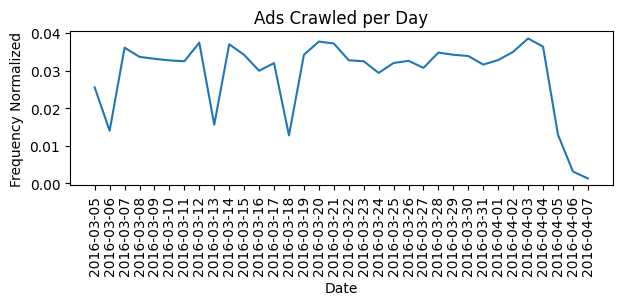

In [20]:
%matplotlib inline

plt.figure(figsize = (7,2))
plt.plot(crawl_start)# Line chart is used to evaulate the time series and frequency
plt.title("Ads Crawled per Day")
plt.ylabel("Frequency Normalized")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.show()

The graph shows information was collected from March 5 - April 7, 2016, a span of 34 days.

The first three noticable drops are observed during March (6th, 13th, 18th) which occurs during the weekend. 

The last drop occurs in the first few days of April, but overall there seems to be an even distribution.

### **`ad_created`**

In [21]:
ad_created = (autos["ad_created"]
                        .str[:10]
                        .value_counts(normalize = True, dropna = False)
                        .sort_index(ascending = True)
                       )

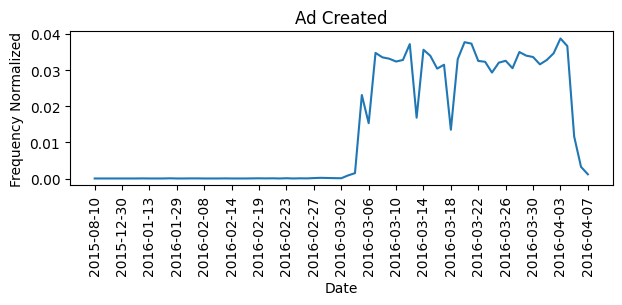

In [22]:
%matplotlib inline

plt.figure(figsize = (7,2))
plt.plot(ad_created)
plt.title("Ad Created")
plt.ylabel("Frequency Normalized")
plt.xticks(ad_created.index[::4],rotation=90)
plt.xlabel("Date")
plt.show()

The range shows the dataset covers listings from as early as August 2015 to April 2016. 

Incidentally, the increase in ads created at the beginning of March 2016 follows closely to when the Crawler began collecting the ad information.

### **`crawl_end`**

In [23]:
crawl_end = (autos["crawl_end"]
                        .str[:10]
                        .value_counts(normalize = True, dropna = False)
                        .sort_index(ascending = True)
                       )

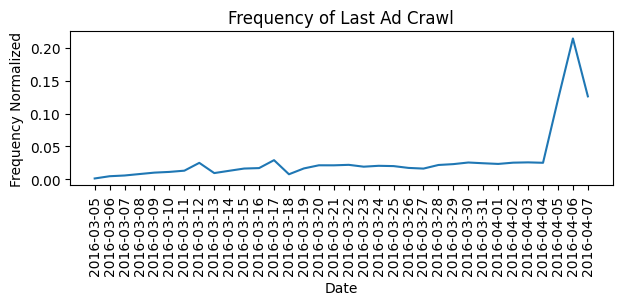

In [24]:
%matplotlib inline

plt.figure(figsize = (7, 2))
plt.plot(crawl_end)
plt.title("Frequency of Last Ad Crawl")
plt.ylabel("Frequency Normalized")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.show()

This column also shows 34 unique dates, similar to `crawl_start`. (The crawler also added the last seen information.)

A uniform distribution is shown until the last few days in the range, where a noticable increase in ads closed.

### **`registration_year`**

Let us quickly analyze the `registration_year` column since it is already in numeric form. 

Applying `.describe()` we notice that min and max values are of concern.

In [25]:
autos["registration_year"].describe()

count    44795.00000
mean      2003.97339
std         74.81955
min       1000.00000
25%       1999.00000
50%       2003.00000
75%       2007.00000
max       9999.00000
Name: registration_year, dtype: float64

**Observations**

Cars were invented around the 1900s, a good 900 years after the min value 1000. The max value, 9999, is far into the future.

The date range contains listings up to the year 2016, and as a car can't first be registered after its listing is seen, any year past 2016 is inaccurate.

Finding the earliest year proves challenging as it can be in any the first few decades of the 1900s.

Let's count the number of listings with cars that fall outside the 1900 - 2016 interval and see if it's safe to remove those rows entirely, or if we need more custom logic.

In [26]:
year_outliers = autos[~autos["registration_year"].between(1900,2016)]
pct_year_outliers = year_outliers.shape[0] / autos["registration_year"].shape[0] * 100
print(f"{pct_year_outliers:.2f}% of the dataset lies outside the 1987-2016 range.")

4.10% of the dataset lies outside the 1987-2016 range.


This can be safely removed from the dataset. 

In [27]:
autos = autos[autos["registration_year"].between(1900,2016)]

### **`registration_month`**

In [28]:
print("Month Counts: ","\n", autos['registration_month'].value_counts().sort_index())

Month Counts:  
 0     3967
1     2825
2     2599
3     4438
4     3559
5     3583
6     3758
7     3337
8     2772
9     2948
10    3219
11    2926
12    3028
Name: registration_month, dtype: int64


**Observations:**

Presumably, the min value 0 corresponds to January, where the max value should be 11 to denote December.

However, we see that the max value is 12, giving us 13 unique indexes.

The counts for each month are distributed quite evenly, making it hard to remove one month in favor of the others.

Moreover, it is unclear whether 0 or 1 can be attributed to January.

We will drop this column to not compromise our data analysis.

In [29]:
autos.drop("registration_month", axis = 1, inplace = True)

After the cleanup process, let's get a look at our dataset before moving forward with analysis

In [30]:
autos.info()
autos.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42959 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   crawl_start        42959 non-null  object
 1   name               42959 non-null  object
 2   price              42959 non-null  int32 
 3   abtest             42959 non-null  object
 4   vehicle_type       40302 non-null  object
 5   registration_year  42959 non-null  int64 
 6   gearbox            40913 non-null  object
 7   power_ps           42959 non-null  int64 
 8   model              40894 non-null  object
 9   odometer_km        42959 non-null  int32 
 10  fuel_type          39725 non-null  object
 11  brand              42959 non-null  object
 12  unrepaired_damage  34847 non-null  object
 13  ad_created         42959 non-null  object
 14  postal_code        42959 non-null  int64 
 15  crawl_end          42959 non-null  object
dtypes: int32(2), int64(3), object(11)
memory

,crawl_start,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,fuel_type,brand,unrepaired_damage,ad_created,postal_code,crawl_end
count,42959,42959,42959.000000,42959,40302,42959.000000,40913,42959.000000,40894,42959.000000,39725,42959,34847,42959,42959.000000,42959
unique,41635,32895,NaN,2,8,NaN,2,NaN,239,NaN,7,40,2,71,NaN,35144
top,2016-03-22 09:51:06,Volkswagen_Golf_1.4,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,75,NaN,22157,11620,NaN,33225,NaN,3487,NaN,26866,9226,30361,1675,NaN,8
mean,NaN,NaN,4129.176680,NaN,NaN,2002.395191,NaN,109.872925,NaN,129684.582974,NaN,NaN,NaN,NaN,50613.600549,NaN
std,NaN,NaN,3863.748169,NaN,NaN,6.750207,NaN,188.566039,NaN,36385.094333,NaN,NaN,NaN,NaN,25736.625285,NaN
min,NaN,NaN,1.000000,NaN,NaN,1910.000000,NaN,0.000000,NaN,5000.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,1150.000000,NaN,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,NaN,NaN,NaN,NaN,30165.000000,NaN
50%,NaN,NaN,2750.000000,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,NaN,NaN,NaN,NaN,49453.000000,NaN
75%,NaN,NaN,6000.000000,NaN,NaN,2007.000000,NaN,140.000000,NaN,150000.000000,NaN,NaN,NaN,NaN,71144.000000,NaN


Since the start, we have removed four columns and cleaned and converted two columns from object to int dtype. 
## Data Analysis
### Exploring Price by Brand
Let's identify the top 10 most common car brands for all listings and visualize the data.

In [31]:
brand_fq = autos["brand"].value_counts(normalize = True).head(10) # returns proportion values
print(brand_fq)

volkswagen       0.214763
opel             0.115203
bmw              0.103541
mercedes_benz    0.088131
audi             0.077562
ford             0.073093
renault          0.050769
peugeot          0.032170
fiat             0.027747
seat             0.019088
Name: brand, dtype: float64


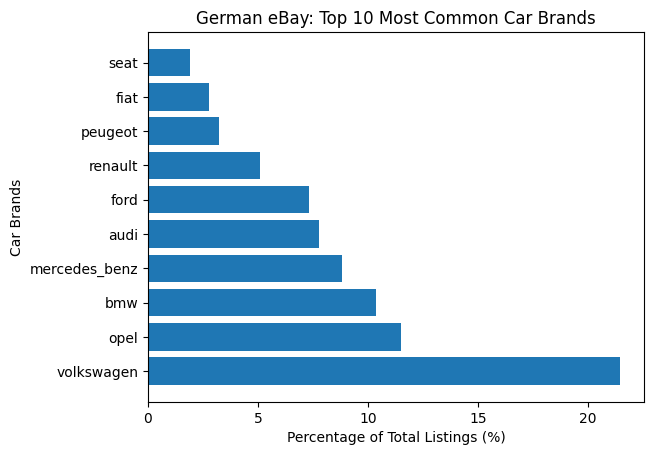

The top 10 brands comprise 80.21% of the total listings.


In [32]:
plt.barh(brand_fq.index, brand_fq.values*100)
plt.title("German eBay: Top 10 Most Common Car Brands")
plt.xlabel("Percentage of Total Listings (%)")
plt.ylabel("Car Brands")
plt.show()

top10_pct = brand_fq.sum()*100
print(f"The top 10 brands comprise {top10_pct:.2f}% of the total listings.")

**Observations**

The most common brands in the listings are Volkswagen at 21%, followed by Opel, BMW and Mercedes Benz at 11.5%, 10.4%, and 9%, respectively. 

We will move forward with the car brands that are at least 5% of the total listings, which stops at Renault at 5.1% or the top 7 brands. 

Now let us aggregate the `brand` column by `price`, determining the average price per brand and visualize the data using a bar graph.

In [33]:
# Create empty dictionary to store average price results
avg_brand_price = {}

# Create an array of the top 7 unique brands
brands = autos["brand"].value_counts().head(7).index

for b in brands:
    # Use boolean comparison to select only the data that correspond to a specific brand
    brand = autos[autos["brand"] == b]
    
    # Calculate the mean price for just that brand
    avg_price = brand["price"].mean()
    
    # Assign the mean price as a value to the brand as a key
    avg_brand_price[b] = int(avg_price) # Change to int to remove decimals

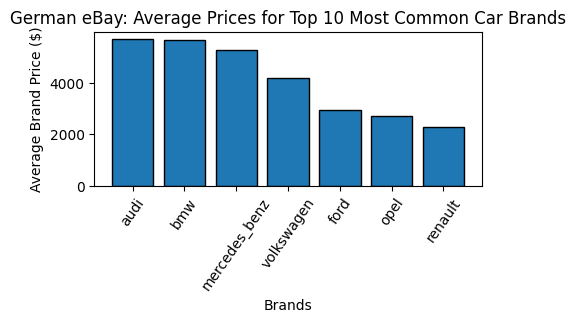

In [34]:
# Convert the dictionary into a series using pd.Series() and plot
avg_brand_price = pd.Series(avg_brand_price).sort_values(ascending = False)
%matplotlib inline

plt.figure(figsize = [5,2])
plt.bar(avg_brand_price.index, avg_brand_price.values, edgecolor = "black")
plt.title("German eBay: Average Prices for Top 10 Most Common Car Brands")
plt.xlabel("Brands")
plt.ylabel("Average Brand Price ($)")
plt.xticks(rotation = 55)
plt.show()

In [35]:
print(avg_brand_price)

audi             5703
bmw              5649
mercedes_benz    5259
volkswagen       4183
ford             2944
opel             2712
renault          2281
dtype: int64


**Observations**

The German brands Audi, BMW and Mercedes seem to have the highest average prices, save for Opel, compared to American Ford and French Renault brands.

Volkswagen again lies in the middle of the prices, offering a balance between popularity and price.

### Exploring Mileage by Brand

Let's do the same for *mileage* (`odometer_km`).

In [36]:
# Create empty dictionary to store average price results
avg_brand_km = {}

for b in brands:
    # Use boolean comparison to select only the data that correspond to a specific brand
    brand = autos[autos["brand"] == b]
    
    # Calculate the mean km for just that brand
    avg_km = brand["odometer_km"].mean()
    
    # Assign the mean km as a value to the brand as a key
    avg_brand_km[b] = int(avg_km) # Change to int to remove decimals

Above, we aggregated the average mileage for each brand.

We would like to gain insight into whether the average distance travelled per brand affects the mean price for that brand. 

Rather than comparing two sets of aggregrated series, let's create a DataFrame for easier comparison.

In [37]:
# Convert the km dictionary into a series using pd.Series()
avg_brand_km = pd.Series(avg_brand_km).sort_values(ascending = False)

# Create a dataframe with the aggregated series for prices, then assign mileage afterwards
agg_df = pd.DataFrame(avg_brand_price, columns = ["mean_price"])
agg_df["mean_km"] = avg_brand_km
agg_df

,mean_price,mean_km
audi,5703,139701
bmw,5649,138833
mercedes_benz,5259,138411
volkswagen,4183,132813
ford,2944,127004
opel,2712,130500
renault,2281,128892


**Observations**

Unexpectedly, the brands with the most mileage are still the most expensive, while the cheaper cars have less mileage. Again, Volkswagen finds its balance between mileage and price.

    Analysis next steps:
        Find the most common brand/model combinations
        Split the odometer_km into groups, and use aggregation to see if average prices follows any patterns based on the mileage.
        How much cheaper are cars with damage than their non-damaged counterparts?

### Exploring Common Brand/Model Combinations
We have already filtered the most common brands in the variable `brands`.

We will begin to explore what models make up each brand.

In [38]:
combo = {}

for b in brands:
    # Use boolean comparison to select only the data that correspond to a specific brand
    brand = autos[autos["brand"] == b]
    
    # Find the counts of models for just that brand
    models = brand["model"].value_counts()
    
    # Assign the counts as a value to the brand as a key
    combo[b] = (models)

In [39]:
print(combo)

{'volkswagen': golf           3487
polo           1604
passat         1299
transporter     542
touran          398
lupo            322
sharan          208
caddy           189
beetle          111
bora            100
andere           93
fox              82
touareg          68
scirocco         66
eos              60
kaefer           52
up               51
tiguan           51
jetta            38
phaeton          23
cc               10
Name: model, dtype: int64, 'opel': corsa       1589
astra       1339
vectra       544
zafira       392
omega        181
meriva       136
andere       120
tigra         91
signum        68
insignia      68
agila         58
combo         52
vivaro        45
kadett        44
calibra       22
antara        18
Name: model, dtype: int64, 'bmw': 3er        2431
5er         991
1er         424
x_reihe     143
7er         110
z_reihe      89
andere       23
6er          15
m_reihe      10
i3            1
Name: model, dtype: int64, 'mercedes_benz': c_klasse    1005
e_k

**Observations**

Within the top brands, we get a list of the models that make up each brand's listing. 

The frequency table for each brand shows which models are the most common for each brand, eg. Mercedes-Benz C-Class, Ford Focus, Opel Corsa, Volkswagen Golf, etc. 

### Exploring Price by Unrepaired Damage

Let's explore how unrepaired damage influences the price for these autombiles. 

We can compare average price per brands with and without damage.

In [40]:
# Create empty dictionary to store average price results
price_no_dmg = {}

# Create an array of the top 7 unique brands

for b in brands:
    # Use boolean comparison to select only the data that correspond to a specific brand
    brand = autos[(autos["brand"] == b) & (autos["unrepaired_damage"] == "nein")]
    
    # Calculate the mean price for just that brand
    avg_price = brand["price"].mean()
    
    # Assign the mean price as a value to the brand as a key
    price_no_dmg[b] = int(avg_price) # Change to int to remove decimals

In [41]:
# Create empty dictionary to store average price results
price_w_dmg = {}

# Create an array of the top 7 unique brands

for b in brands:
    # Use boolean comparison to select only the data that correspond to a specific brand
    brand = autos[(autos["brand"] == b) & (autos["unrepaired_damage"] == "ja")]
    
    # Calculate the mean price for just that brand
    avg_price = brand["price"].mean()
    
    # Assign the mean price as a value to the brand as a key
    price_w_dmg[b] = int(avg_price) # Change to int to remove decimals
    
price_w_dmg = pd.Series(price_w_dmg)

In [42]:
# Creat a dataframe containing both series created from above for easier plotting

dmg_df = pd.DataFrame(price_w_dmg, columns = ["price_w_dmg"])
dmg_df["price_no_dmg"] = price_no_dmg

<AxesSubplot: ylabel='Prices ($)'>

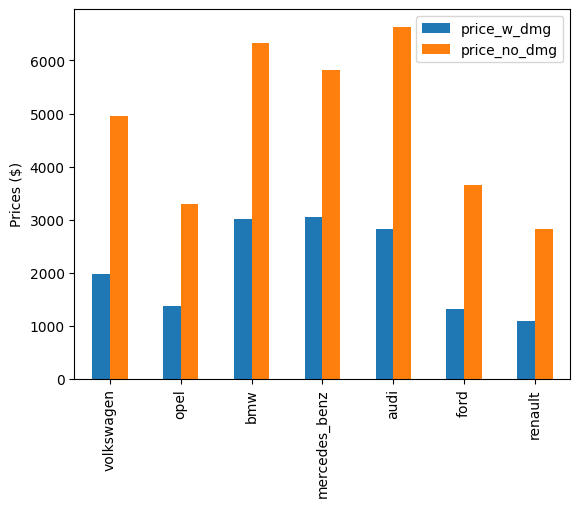

In [43]:
%matplotlib inline

dmg_df.plot(kind = "bar", ylabel = "Prices ($)")

**Observations**

Expectedly, the prices reflect approximately x2 price decrease for vehicles with unrepaired damages.

# Conclusion
The goal of this project was to clean and analyze a dataset of used cars.

Our analysis involved removal of null values and numeric outliers, typecasting, string correction and other techniques to explore the German eBay classified auto listings.

The influence of price, mileage and unrepaired damages are some of the insights uncovered with the clean dataset. 

Many more insights can be gained upon revisting the data, but for now this project provides an intermediate combination of data cleaning and exploration with visualization.